# Assignment 8 - Wine Classifier
## Author - Salinee Kingbaisomboon
### UW NetID: 1950831

## Instructions
1. Use the provided RedWhiteWine.csv file. Include ALL the features with “Class” being your output vector
2. Use the provided Simple Perceptron Neural Network notebook to develop a multi-layer feed-forward/backpropagation neural network
3. Be able to adjust the following between experiments:
    - Learning Rate
    - Number of epochs
    - ~~Depth of architecture—number of hidden layers between the input and output layers~~ <font color=red>I didn't implement this one.</font>
    - Number of nodes in a hidden layer — width of the hidden layers
    - (optional) Momentum
4. Determine what the best neural network structure and hyperparameter settings results in the best predictive capability

**Note:** I implement <font color=blue>**two layers**</font> Neuron Network with flexible **Learning Rate**, **Number of epochs** and **Number of nodes in a hidden layer**

In [32]:
# Load necessary libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore") # To suppress warning

pd.options.display.max_rows = None
pd.options.display.max_columns = None

%matplotlib inline

# Declare Functions used in this assignment

In [33]:
# define the dimentions and set the weights to random numbers for Two layers network
def init_parameters(X, Y, hidden_size):
    input_size = X.shape[0] # number of neurons in input layer
    output_size = Y.shape[0] # number of neurons in output layer
    
    W1 = np.random.randn(hidden_size, input_size)*np.sqrt(2/input_size) # weight link between input & hidden layer 1
    b1 = np.zeros((hidden_size, 1)) # bias link between hidden layer 2 & output
    W2 = np.random.randn(output_size, hidden_size)*np.sqrt(2/hidden_size) # weight link between hidden layer 1 & hidden layer 2
    b2 = np.zeros((output_size, 1)) # bias link between input & hidden layer 1
    return {'W1': W1, 'W2': W2, 'b1': b1, 'b2': b2}

In [34]:
# Creating a numerically stable logistic s-shaped definition to call
def sigmoid(x):
    x = np.clip(x, -500, 500)
    if x.any()>=0:
        return 1/(1 + np.exp(-x))
    else:
        return np.exp(x)/(1 + np.exp(x))

In [35]:
# Two layers network: Forward Prop
def fwd_prop(X, params):
    Z1 = np.dot(params['W1'], X)+params['b1'] # dot product of the weights and X + bias
    A1 = sigmoid(Z1) # predicted vector from hidden layer 1
    Z2 = np.dot(params['W2'], A1)+params['b2'] # dot product of the weights and X + bias
    y = sigmoid(Z2) # predicted vector from hidden layer 2 (output)
    return y, {'Z1': Z1, 'Z2': Z2, 'A1': A1, 'y': y}

In [36]:
def cost(predict, actual):
    m = actual.shape[1] 
    cost__ = -np.sum(np.multiply(np.log(predict), actual) + np.multiply((1 - actual), np.log(1 - predict)))/m
    return np.squeeze(cost__)

In [37]:
#Two layers network: Backprop
def back_prop(X, Y, params, cache):
    m = X.shape[1] # number of inputs
    dy = cache['y'] - Y
    dW2 = (1 / m) * np.dot(dy, np.transpose(cache['A1']))
    db2 = (1 / m) * np.sum(dy, axis=1, keepdims=True) # cost of error
    dZ1 = np.dot(np.transpose(params['W2']), dy) * (1-np.power(cache['A1'], 2)) # subtract actual from pred weights
    dW1 = (1 / m) * np.dot(dZ1, np.transpose(X)) # calc new weight vector
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True) # calc new bias vector
    return {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2} # Weight and bias vectors after backprop

In [38]:
def update_parameters(gradients, params, learning_rate = 1.2):
    W1 = params['W1'] - learning_rate * gradients['dW1']
    b1 = params['b1'] - learning_rate * gradients['db1']
    W2 = params['W2'] - learning_rate * gradients['dW2']
    b2 = params['b2'] - learning_rate * gradients['db2']
    return {'W1': W1, 'W2': W2, 'b1': b1, 'b2': b2}

In [50]:
def run_grad_desc(X, Y, learning_rate, hidden_size, num_epochs):
    # initialize the parameters
    params = init_parameters(X, Y, hidden_size)
    cost_ = []
    errors = []
    for j in range(num_epochs):
        y, cache = fwd_prop(X, params) # forward propagate through, get predicted vector
        costit = cost(y, Y) # get an initial cost
        error = np.mean(np.abs(y - Y)) # get mean of absolute error for each epoch
        errors.append(error)
        gradients = back_prop(X, Y, params, cache) # get gradient from back propagation
        params = update_parameters(gradients, params, learning_rate) # update parameters
        cost_.append(costit) # get a new cost after back propagation
    return params, cost_, errors

# Read and perform data cleaning

In [40]:
# Load data
filename = 'https://library.startlearninglabs.uw.edu/DATASCI420/2019/Datasets/RedWhiteWine.csv'
df = pd.read_csv(filename)

In [41]:
# View first five rows of the data frame
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [42]:
# Described DataFrame
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Class
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [43]:
# Print DataFrame's size
print(df.shape)
# Print DataFrame's data types
# Note: we can see that all columns were numeric columns now (after did the onehot-encoded), except the target columns
print(df.dtypes)

(6497, 13)
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Class                     int64
dtype: object


## Split Test and Train data

In [44]:
# Separate the independent variables (AKA Features) from the dependent labels (AKA Target)
targetOutcome = pd.DataFrame(df,columns=['Class'])
allFeatures = pd.DataFrame(df,columns=df.columns.difference(['Class']))

# Split the Training (90%) and Testing Data (10%)
X, XX, Y, YY = train_test_split(allFeatures, targetOutcome, test_size = 0.1, random_state = 0)

## Normalize Data

In [45]:
# Define the scaler for normalization
standard_scaler = StandardScaler().fit(X)

# Normalize the training dataset
X = standard_scaler.transform(X)

# Normalize the test dataset
XX = standard_scaler.transform(XX)

# Convert label data into numpy array
Y = Y.to_numpy() # .values for older version
YY = YY.to_numpy() # .values for older version

## Initialize Hyperparameters

In [46]:
learning_rate = 0.01
num_epochs = 5000
depth_of_architecture = 1 # number of hidden layers between the input and output layers
hidden_size = 5 # width of the hidden layers

np.random.seed(3)

## Running the Experiment

Text(0, 0.5, 'Error')

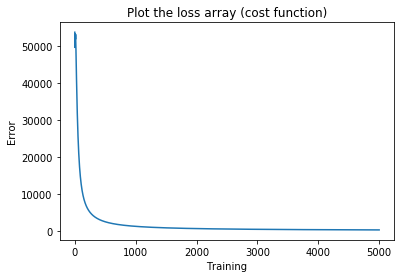

In [51]:
params, cost_, errors = run_grad_desc(X, Y, learning_rate, hidden_size, num_epochs)
plt.plot(cost_)
plt.title('Plot the loss array (cost function)')
plt.xlabel('Training')
plt.ylabel('Error')

In [52]:
# get the mean of accuracy rate for all epochs
error = np.mean(errors)
accuracy = (1 - error) * 100
print("Training Accuracy " + str(round(accuracy,2)) + "%")

Training Accuracy 98.04%


***
**Summary:**
The best 2-layered neural network structure with following hyperparameters:
- Learning Rrate = 0.01
- Number of epochs = 5000
- Width of the Hidden Layers = 5

Note: I manually run the code with some arbitary settings and this structure gave me the best **Accuracy Prediction** (98.04% on the Training data).
Note 2: I tried to run in a loop to change the settings but it does take a very long time.  
***